In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes in a list.
coordinates = list(lat_lngs)

In [5]:
# import the citipy module.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

587

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Import the time library and the datetime module from the datetime library.
import time
from datetime import datetime

In [10]:
#Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if(i % 50 ==0 and i>=50):
        set_count += 1
        record_count = 1
        
    #Create endpoint url for each city.
    city_url = url + "&q=" + city.replace(" ","+")
        
    #Log the url,record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
        
    #Add 1 to the record count.
    record_count += 1
        
#Run an API request for each of the cities.
    try:
        #Parse the JSON and retrieve the data.
        city_weather = requests.get(city_url).json()
        #Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
            
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
            
        #Append the city information into city_data list.
        city_data.append({"City": city.title(),
                             "Lat": city_lat,
                             "Lng": city_lng,
                             "Max Temp": city_max_temp,
                             "Humidity": city_humidity,
                             "Cloudiness": city_clouds,
                             "Wind Speed": city_wind,
                             "Country": city_country,
                             "Date": city_date})
#If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
#Indicate the data loading is complete.
print("------------------------------")
print("Data Retrieval Complete       ")
print("------------------------------")       
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | ekhabi
Processing Record 3 of Set 1 | kysyl-syr
Processing Record 4 of Set 1 | dalianwan
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | atuona
Processing Record 8 of Set 1 | hobart
Processing Record 9 of Set 1 | foster city
Processing Record 10 of Set 1 | barrow
Processing Record 11 of Set 1 | avarua
Processing Record 12 of Set 1 | husavik
Processing Record 13 of Set 1 | rognan
Processing Record 14 of Set 1 | shirokaya rechka
Processing Record 15 of Set 1 | marsa matruh
Processing Record 16 of Set 1 | kapaa
Processing Record 17 of Set 1 | clyde river
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | lagoa
Processing Record 20 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 21 of Set 1 | puerto ayora
Processing Record 22 of Set 1 | tasiilaq
Processin

Processing Record 39 of Set 4 | luderitz
Processing Record 40 of Set 4 | weligama
Processing Record 41 of Set 4 | thompson
Processing Record 42 of Set 4 | acarau
Processing Record 43 of Set 4 | fort nelson
Processing Record 44 of Set 4 | nabire
Processing Record 45 of Set 4 | sur
Processing Record 46 of Set 4 | leh
Processing Record 47 of Set 4 | bathsheba
Processing Record 48 of Set 4 | kentau
Processing Record 49 of Set 4 | el alto
Processing Record 50 of Set 4 | lebu
Processing Record 1 of Set 5 | marrakesh
Processing Record 2 of Set 5 | constitucion
Processing Record 3 of Set 5 | opelika
Processing Record 4 of Set 5 | asfi
Processing Record 5 of Set 5 | severo-kurilsk
Processing Record 6 of Set 5 | comodoro rivadavia
Processing Record 7 of Set 5 | san quintin
Processing Record 8 of Set 5 | kununurra
Processing Record 9 of Set 5 | iralaya
Processing Record 10 of Set 5 | umzimvubu
City not found. Skipping...
Processing Record 11 of Set 5 | tiksi
Processing Record 12 of Set 5 | dajal


Processing Record 27 of Set 8 | waingapu
Processing Record 28 of Set 8 | anadyr
Processing Record 29 of Set 8 | koson
Processing Record 30 of Set 8 | ahuimanu
Processing Record 31 of Set 8 | dudinka
Processing Record 32 of Set 8 | rockhampton
Processing Record 33 of Set 8 | cheuskiny
City not found. Skipping...
Processing Record 34 of Set 8 | bilibino
Processing Record 35 of Set 8 | berdigestyakh
Processing Record 36 of Set 8 | ilyich
Processing Record 37 of Set 8 | sao filipe
Processing Record 38 of Set 8 | teguise
Processing Record 39 of Set 8 | gondanglegi
Processing Record 40 of Set 8 | tshane
Processing Record 41 of Set 8 | miranda
Processing Record 42 of Set 8 | muravlenko
Processing Record 43 of Set 8 | berlevag
Processing Record 44 of Set 8 | toliary
City not found. Skipping...
Processing Record 45 of Set 8 | nieuwpoort
Processing Record 46 of Set 8 | sangin
Processing Record 47 of Set 8 | rodrigues alves
Processing Record 48 of Set 8 | olinda
Processing Record 49 of Set 8 | bu

Processing Record 15 of Set 12 | daimiel
Processing Record 16 of Set 12 | samalaeulu
City not found. Skipping...
Processing Record 17 of Set 12 | matagalpa
Processing Record 18 of Set 12 | sorong
Processing Record 19 of Set 12 | haibowan
City not found. Skipping...
Processing Record 20 of Set 12 | west wendover
Processing Record 21 of Set 12 | azangaro
Processing Record 22 of Set 12 | moerai
Processing Record 23 of Set 12 | yafran
Processing Record 24 of Set 12 | otane
Processing Record 25 of Set 12 | puerto del rosario
Processing Record 26 of Set 12 | ust-kuyga
Processing Record 27 of Set 12 | suntar
Processing Record 28 of Set 12 | banikoara
Processing Record 29 of Set 12 | rincon
Processing Record 30 of Set 12 | konevo
Processing Record 31 of Set 12 | miri
Processing Record 32 of Set 12 | yaan
Processing Record 33 of Set 12 | mityana
Processing Record 34 of Set 12 | ocos
Processing Record 35 of Set 12 | stornoway
Processing Record 36 of Set 12 | acapulco
Processing Record 37 of Set 

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,31.66,93,75,5.66,AR,2022-06-16 21:22:19
1,Ekhabi,53.5102,142.9671,42.85,97,100,4.76,RU,2022-06-16 21:22:20
2,Kysyl-Syr,63.8986,122.7617,52.81,66,0,7.38,RU,2022-06-16 21:22:20
3,Dalianwan,39.0286,121.6950,68.04,88,48,8.95,CN,2022-06-16 21:22:21
4,Bethel,41.3712,-73.4140,69.89,84,100,8.05,US,2022-06-16 21:22:21
5,Busselton,-33.6500,115.3333,65.46,73,98,21.74,AU,2022-06-16 21:22:21
6,Atuona,-9.8000,-139.0333,77.90,70,2,19.86,PF,2022-06-16 21:22:22
7,Hobart,-42.8794,147.3294,43.27,94,20,4.61,AU,2022-06-16 21:22:22
8,Foster City,37.5586,-122.2711,82.11,58,20,21.85,US,2022-06-16 21:22:23
9,Barrow,71.2906,-156.7887,50.02,76,0,6.91,US,2022-06-16 21:22:23


In [13]:
# Reorder columns.
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2022-06-16 21:22:19,-54.8000,-68.3000,31.66,93,75,5.66
1,Ekhabi,RU,2022-06-16 21:22:20,53.5102,142.9671,42.85,97,100,4.76
2,Kysyl-Syr,RU,2022-06-16 21:22:20,63.8986,122.7617,52.81,66,0,7.38
3,Dalianwan,CN,2022-06-16 21:22:21,39.0286,121.6950,68.04,88,48,8.95
4,Bethel,US,2022-06-16 21:22:21,41.3712,-73.4140,69.89,84,100,8.05
5,Busselton,AU,2022-06-16 21:22:21,-33.6500,115.3333,65.46,73,98,21.74
6,Atuona,PF,2022-06-16 21:22:22,-9.8000,-139.0333,77.90,70,2,19.86
7,Hobart,AU,2022-06-16 21:22:22,-42.8794,147.3294,43.27,94,20,4.61
8,Foster City,US,2022-06-16 21:22:23,37.5586,-122.2711,82.11,58,20,21.85
9,Barrow,US,2022-06-16 21:22:23,71.2906,-156.7887,50.02,76,0,6.91


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

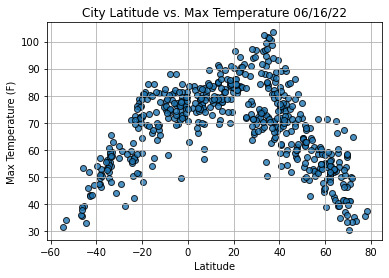

In [17]:
# Import time module.
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

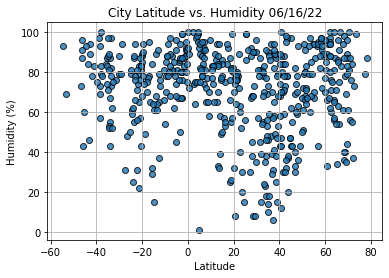

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

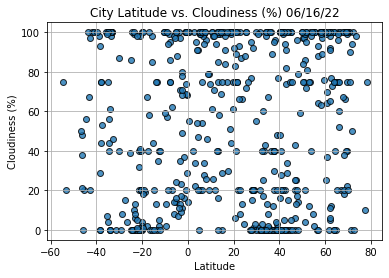

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

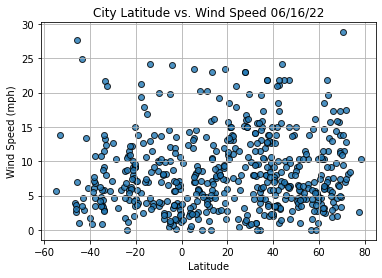

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()